### Stiff System of Initial Value Problems (IVPs): Biological Reactor Model

This section demonstrates how to solve a stiff system of two coupled ordinary differential equations (ODEs) representing substrate consumption and biomass growth in a biological reactor.

#### Equations

We solve the following system:

$$
\begin{cases}
\dfrac{dS}{dt} = -k \cdot y \cdot B \cdot \dfrac{S}{K_m + S} \\
\dfrac{dB}{dt} = k \cdot B \cdot \dfrac{S}{K_m + S}
\end{cases}
$$

with initial conditions:

$$
S(0) = 5, \quad B(0) = 0.05
$$

and parameters:

- \( k = 0.3 \) (rate constant)  
- \( y = 0.75 \) (yield coefficient)  
- \( K_m = 1 \times 10^{-6} \) (Monod constant)  
- \( t \in [0, 20] \)

#### Purpose

To simulate the time evolution of substrate \( S(t) \) and biomass \( B(t) \) using a stiff solver (`method='BDF'`). This is essential for accurately modeling biological systems with rapid transients or nonlinear feedback.

#### Numerical Stability and Non-Negativity

Biological concentrations such as substrate \( S \) and biomass \( B \) must remain non-negative throughout the simulation. However, stiff solvers like BDF may produce small negative values due to numerical artifacts, especially near sharp gradients or low concentrations.

To ensure physical realism and numerical stability, we enforce non-negativity **within the derivative function** by clipping the state variables:

```python
S, B = np.maximum(vars, 0.0)
if S <= 0.0 or B <= 0.0:
 rate = 0.0
else:
 rate = k * B * S / (Km + S)
```
This guarantees that the reaction rate is computed only from valid, non-negative concentrations. If either S or B becomes zero or negative, the rate is set to zero.


Ref: https://polymathplus.org/

In [15]:
# Load required libraries
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

In [16]:
# Define the stiff system of ODEs for biological reactor

def reactor(t, vars, k, y, Km):
    """
    Stiff biological reactor model:
    dS/dt = -k * y * B * S / (Km + S)
    dB/dt =  k * B * S / (Km + S)

    Parameters:
    - t: time (scalar)
    - vars: list or array of [S, B]
    - k: rate constant
    - y: yield coefficient
    - Km: Monod constant

    Returns:
    - [dS/dt, dB/dt]: derivatives of substrate and biomass
    """

    # Clip substrate (S) and biomass (B) to ensure non-negative values
    S, B = np.maximum(vars, 0.0)

    # Avoid division by zero or instability near Km → use safe rate expression
    if S <= 0.0 or B <= 0.0:
        rate = 0.0
    else:
        rate = k * B * S / (Km + S)

    # Compute derivatives
    dSdt = -y * rate
    dBdt = rate

    return [dSdt, dBdt]

In [17]:
# Define parameters
k = 0.3
y = 0.75
Km = 1e-6

# Initial conditions
S0 = 5.0
B0 = 0.05
t_span = (0, 20)

# Solve using a stiff solver (BDF)
solution = solve_ivp(reactor, t_span, [S0, B0], args=(k, y, Km), method='BDF', dense_output=True)

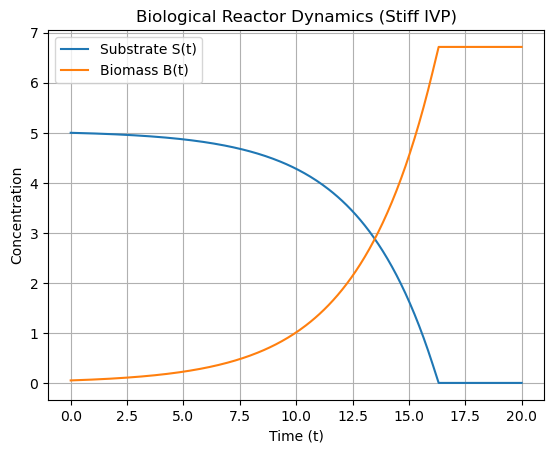

In [18]:
# Generate time points for plotting
t_vals = np.linspace(t_span[0], t_span[1], 300)
S_vals, B_vals = solution.sol(t_vals)

# Plot substrate and biomass over time
plt.plot(t_vals, S_vals, label='Substrate S(t)')
plt.plot(t_vals, B_vals, label='Biomass B(t)')
plt.xlabel('Time (t)')
plt.ylabel('Concentration')
plt.title('Biological Reactor Dynamics (Stiff IVP)')
plt.grid(True)
plt.legend()
plt.show()